### <a href="Gym_Member_Dataset_pg1.ipynb" target="_self">Understanding The Data</a>&nbsp; &nbsp; &nbsp;<a href="Gym_Member_Dataset_pg2.ipynb" target="_self">Key Indicators</a>&nbsp; &nbsp; &nbsp;<a href="Gym_Member_Dataset_pg3.ipynb" target="_self">Calorie Predictions</a>
# **Predicting Average Calories Burned Using Key Performance Indicators**

The following key performace indicators will be evaluated for a correlation with overall calories burned to determine which have the largest impact:
- Gender
- Age
- Workout Type
- BMI
- Experience Level
- Workout Frequency
- Session Duration
- BPM (Average, Resting, and Max)
- Water Intake

In [928]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('source.csv')


## Average Calories Burned By Gender

The following chart shows the average amount of calories burned by both men and women per session. 

We can see that the averages are both very similar with men burning approximately 950 calories per session and women burning approximiately 850. This likely means that there will not be a very high correlation between gender and overall calories burned. Regardless, for the rest of the key performance indicators, results will be split into both male and female categories to check for areas where there may be differences. 

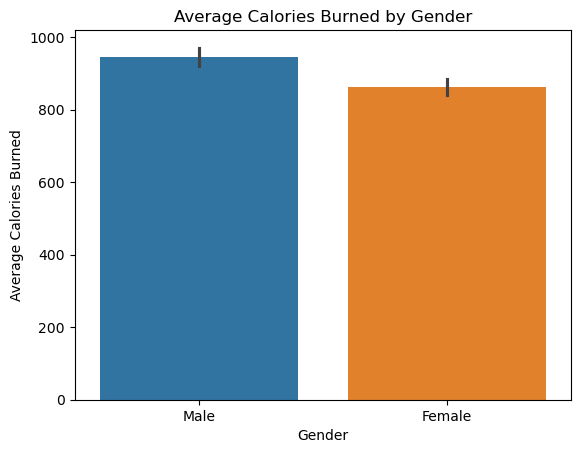

In [930]:
sns.barplot(data=data, x='Gender', hue='Gender', y='Calories_Burned', estimator='mean', legend=False)
plt.title('Average Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Calories Burned')
plt.show()

## Average Calories Burned By Age

Below is a chart that shows the average amount of calories burned by age and gender.

This chart shows a relatively consistent amount of calories burned for both genders from ages 20-40, with a slow decline from 40-60 of about 200 calories for men and 150 calories for women. This is likely because around age 30 for men and late 30s for women, bodies begin to change and metabolism tends to slow down, making it harder for the body to burn calories. One might think this would have a larger impact on overall calories burned, however the change seems to be relatively low.

You will notice there is also a sharp decrease in calories burned for men at around 31 and women at 37.

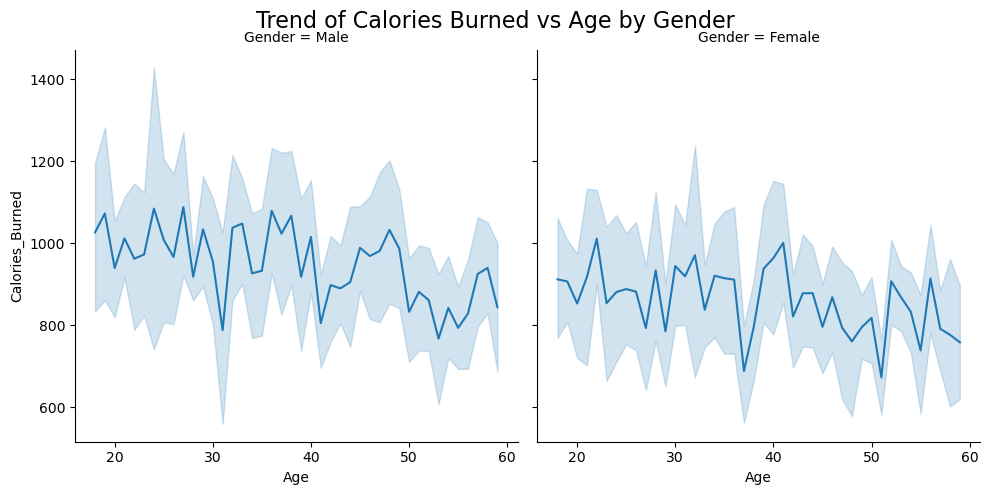

In [932]:
sns.FacetGrid(data, col='Gender', height=5).map(sns.lineplot, 'Age', 'Calories_Burned')
plt.subplots_adjust(top=0.9)
plt.suptitle('Trend of Calories Burned vs Age by Gender', fontsize=16)
plt.show()

We know from the earlier evaluation of our overall data that the least represented age group in this sample is 22-38 year olds. When broken down further into age distribution by gender, you will see that at around age 31 there is a much lower amount of men that were sampled and this is the same case around mid 30s for women. This makes these age groups significantly more likely to be impacted by outliers.

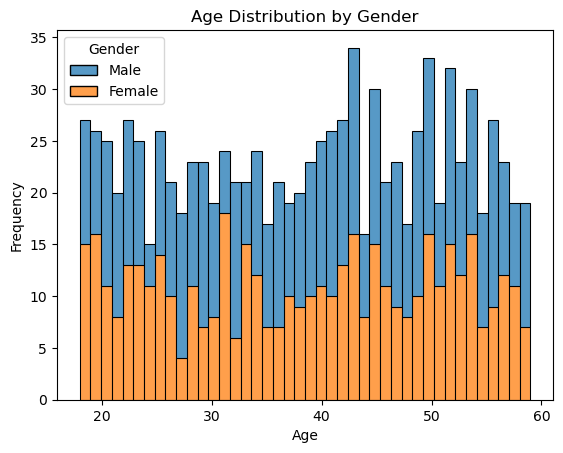

In [934]:
sns.histplot(data=data, x="Age", hue="Gender", multiple="stack", kde=False, bins=42)

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Average Calories Burned By Workout Type

The following boxplot shows the distribution of calories burned based on workout types.

The plot shows that on average those in the samples burned the same amount of calories no matter what type of workout they did. All the workout tyes share a median of about 900-950 for men and 850-900 for women. The interquartile range for men was approximately 750-1150 and for women it was 700-1100.

This likely means there will be little correlation between workout type and overall calories burned.

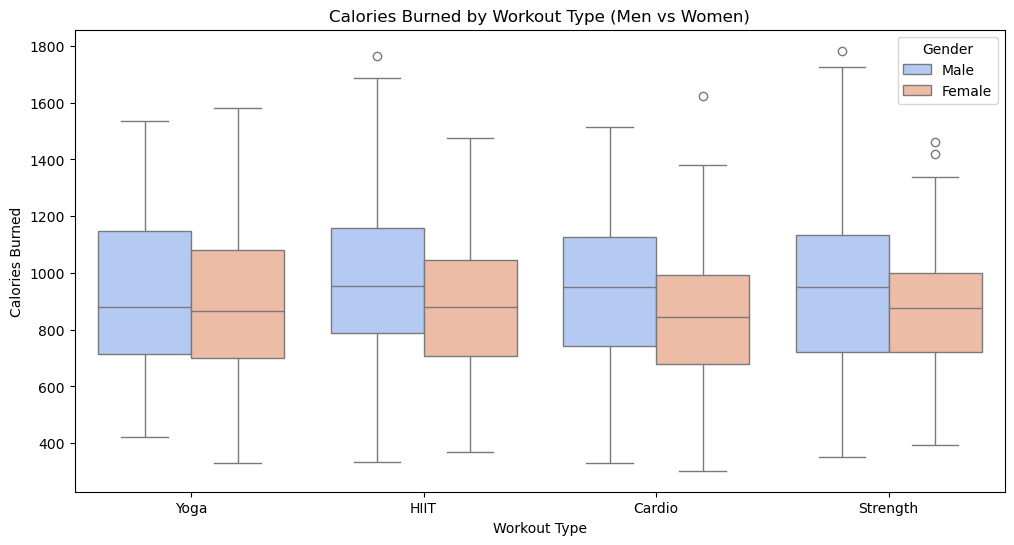

In [936]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Workout_Type', y='Calories_Burned', hue='Gender', data=data, palette='coolwarm')
plt.title('Calories Burned by Workout Type (Men vs Women)')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()


## Average Calories Burned By BMI

The below scatterplot shows little to no correlation between BMI and overall calories burned in a session. 

Something interesting to note would be the amount of men included in the sample with higher BMIs. While the range of women sampled is between 15-35, the range for men is between 15-50. 

In these higher ranges for men we can see calories burned seems to stay below 1400 possibly meaning that a higher BMI might affect calories burned, however this correlation if any would not be strong. It would be helpful to see the data for more men in this range (35-50),as well as women in this same range for a better evaluation.

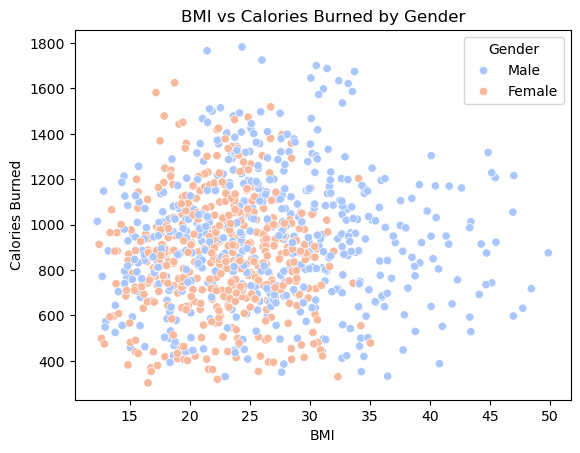

In [938]:
sns.scatterplot(data=data, x='BMI', y='Calories_Burned', hue='Gender', palette='coolwarm')
plt.title('BMI vs Calories Burned by Gender')
plt.xlabel('BMI')
plt.ylabel('Calories Burned')
plt.legend(title='Gender')
plt.show()

## Average Calories Burned By Experience

This dataset included 3 levels of experience, 1 being the least experienced and 3 being the most. When filtered by gender we can see that the higher a persons experience level is, the more calories they tend to burn on average. This makes sense, as a persons experience level may impact their knowledge of how to burn calories effectively.

It is important to note that there were significantly less individuals sampled that fell under the 3rd level of experience so this column may be more likely to be affected by outliers, making it less reliable than the first two. However, the slight increase in the first two columns indicate that there likely may be some kind of correlation between an individuals experience level and the overall calories they burn in a session.

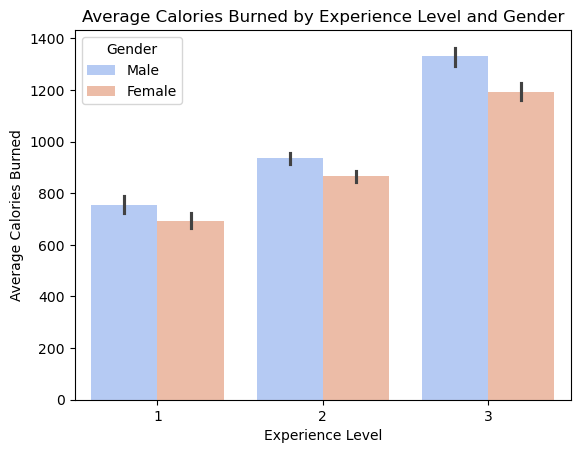

In [940]:
sns.barplot(data=data, x='Experience_Level', y='Calories_Burned', hue='Gender', palette='coolwarm')
plt.title('Average Calories Burned by Experience Level and Gender')
plt.xlabel('Experience Level')
plt.ylabel('Average Calories Burned')
plt.show()

## Average Calories Burned By Workout Frequency

This dataset included samples from individuals that workout between 2-5 days/week. 

The barplot below illustrates that the more days a week a person works out, the more calories they tend to burn per session. While the difference isn't that large for the first few categories, it spikes at 5 days.

This is likely because the more often a person works out, the higher their experience will be. As we saw in the last category (Average Calories Burned By Experience Level), the more experience a person has likely means they are more knowledgeable about the workouts they are doing and are able to burn calories more effectively. This could also work inversely, as people with high experience levels may be the people who choose to go to the gym more often.

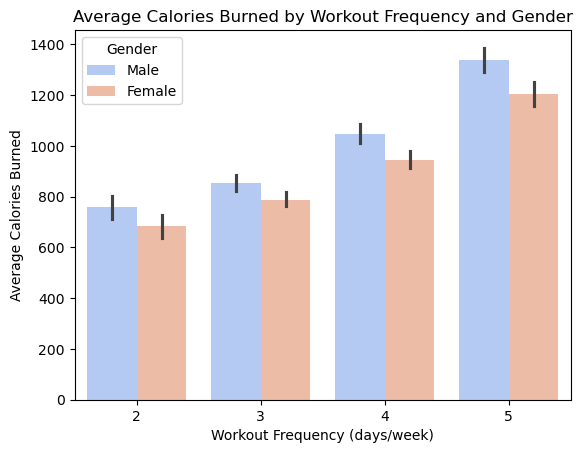

In [942]:
sns.barplot(data=data, x='Workout_Frequency (days/week)', y='Calories_Burned', hue='Gender', palette='coolwarm')
plt.title('Average Calories Burned by Workout Frequency and Gender')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Average Calories Burned')
plt.show()

In the next plot we can see that this is in fact the case. Those with lower experience levels have atendency to workout only 2-3 days/week, while those with high experience levels tend to workout 4-5 days/week.

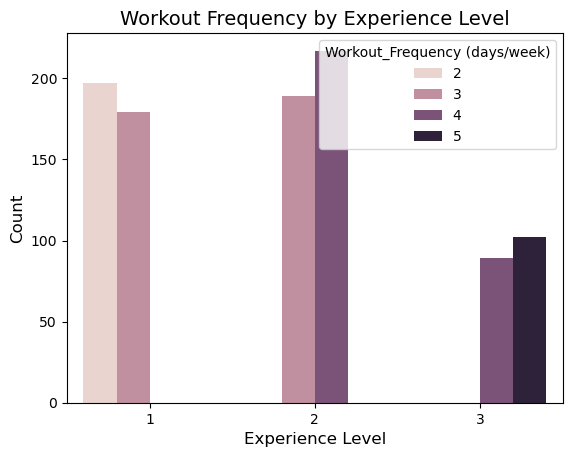

In [944]:
sns.countplot(data=data, x='Experience_Level', hue='Workout_Frequency (days/week)')

plt.title('Workout Frequency by Experience Level', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Average Calories Burned By Session Duration

The following scatterplots show the relationship between calories burned during a session and session length in hours.

It is clear there is likely a strong relationship between these two variables given the plots. The longer a person spends working out, the more calaries they will likely burn.

This is understandable as working out in any manner burns calories, so logically the more one works out the more calories they will burn.

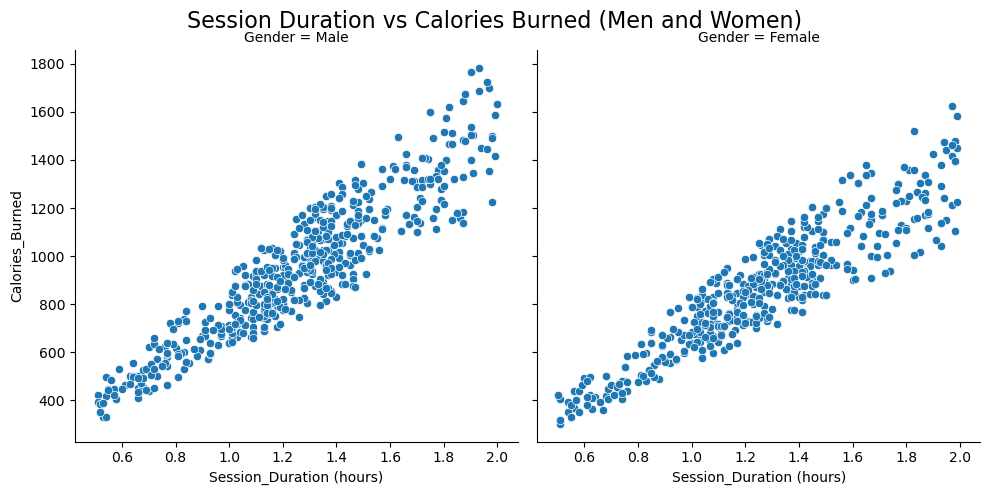

In [946]:
sns.FacetGrid(data, col='Gender', height=5).map(sns.scatterplot, 'Session_Duration (hours)', 'Calories_Burned')
plt.subplots_adjust(top=0.9)
plt.suptitle('Session Duration vs Calories Burned (Men and Women)', fontsize=16)
plt.show()

## Average Calories Burned By BPM

Based on the below scatterplots, it is clear both Resting BPM and Max BPM have little to no correlation with average calories burned in a session. The amount of calories burned across these factors tends to remain consistent.

There does seem to be a slight increase in the amount of average calories burned in a session when individuals have a higher Average BPM.

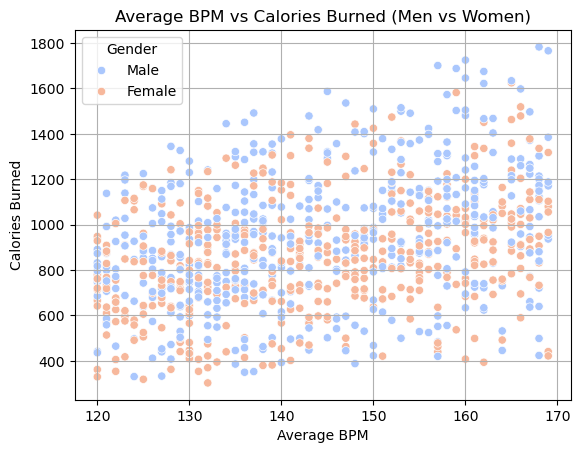

In [948]:
sns.scatterplot(data=data, x='Avg_BPM', y='Calories_Burned', hue='Gender', palette='coolwarm')
plt.title('Average BPM vs Calories Burned (Men vs Women)')
plt.xlabel('Average BPM')
plt.ylabel('Calories Burned')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

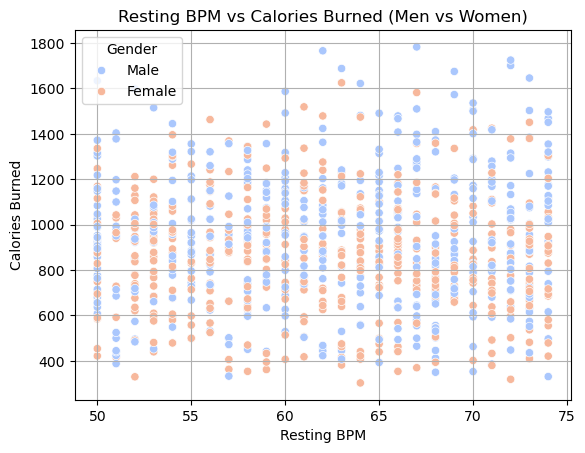

In [949]:
sns.scatterplot(data=data, x='Resting_BPM', y='Calories_Burned', hue='Gender', palette='coolwarm')
plt.title('Resting BPM vs Calories Burned (Men vs Women)')
plt.xlabel('Resting BPM')
plt.ylabel('Calories Burned')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

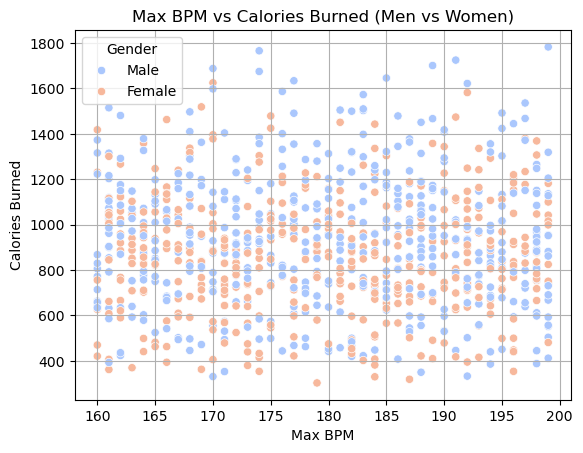

In [950]:
sns.scatterplot(data=data, x='Max_BPM', y='Calories_Burned', hue='Gender', palette='coolwarm')
plt.title('Max BPM vs Calories Burned (Men vs Women)')
plt.xlabel('Max BPM')
plt.ylabel('Calories Burned')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

When evaluated in a heatmap, we can see that while there appeared to be a slight increase in calories burned when an individuals average bpm is higher, there is not a strong enough relationship between the variables to establish a correlation.

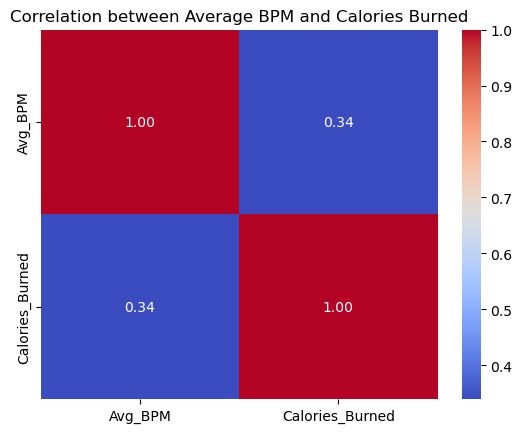

In [952]:
corr = data[['Avg_BPM', 'Calories_Burned']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Average BPM and Calories Burned')
plt.show()

## Average Calories Burned By Water Intake

Much like the case with Average BPM there is not a strong enough relationship between water intake and average calories burned in a session to establish a correlation.

This is surprising as one would think that burning more calories in a session would lead a person to drink more water, however this does not seem to be the case.

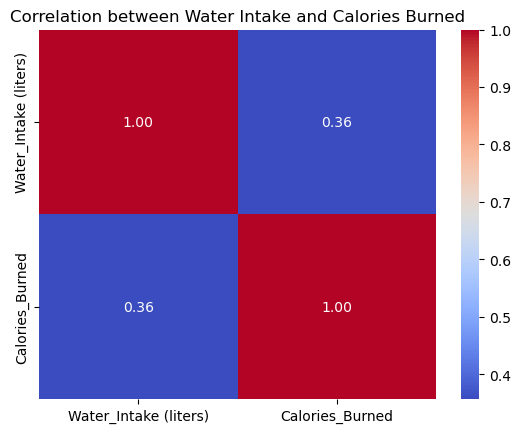

In [954]:
corr = data[['Water_Intake (liters)', 'Calories_Burned']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Water Intake and Calories Burned')
plt.show()

## Correlation Heatmap of Calories Burned By Strongest Indicators

The strongest indicators that might affect the overall calories burned thus far seem to be Workout Frequency, Experience Level, and Session Duration.

When these variables are all placed into a heatmap we can see a few things. The strongest correlation with calories burned is session duration. Workout frequecy and experience level appear to have more of a correlation with each other than with calories burned. Of the two variables, experience level has a larger impact on calories burned than workout frequency.

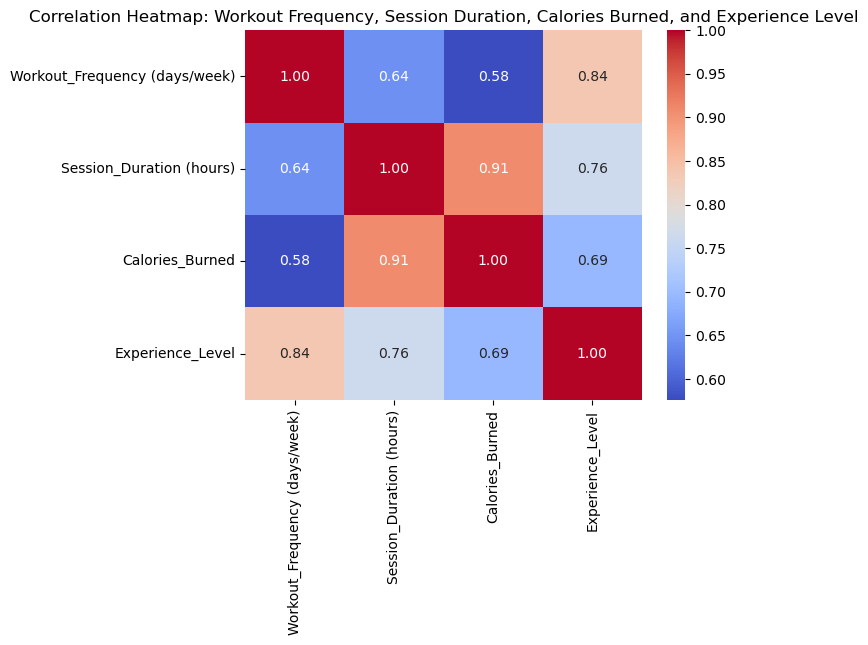

In [956]:
corr_matrix = data[["Workout_Frequency (days/week)", "Session_Duration (hours)", "Calories_Burned", "Experience_Level"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Workout Frequency, Session Duration, Calories Burned, and Experience Level')

plt.show()